## import libraries

In [1]:
## Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

## Load our dataset

In [2]:
df = pd.read_csv("train.csv")
X=df['text']
y=df['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

## Data information

In [3]:
df = df.set_index('id')
df

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


## Handling Missing Data


In [4]:
print(df.isna().sum())

keyword       61
location    2533
text           0
target         0
dtype: int64


In [5]:
## Remove any row having nan value in any of its column.
df=df.dropna()
df

,keyword,location,text,target
id,,,,
48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0


## Data in each class

In [6]:
print(f"Number of rows in this data frame is {len(df)}")
df.describe(include="all")

Number of rows in this data frame is 5080


,keyword,location,text,target
count,5080,5080,5080,5080.000000
unique,221,3341,5028,NaN
top,collision,USA,#Bestnaijamade: 16yr old PKK suicide bomber wh...,NaN
freq,36,104,6,NaN
mean,NaN,NaN,NaN,0.432283
std,NaN,NaN,NaN,0.495442
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


##  top 15 locations of the data

In [7]:
df["location"].head(15)

id
48                       Birmingham
49    Est. September 2012 - Bristol
50                           AFRICA
52                 Philadelphia, PA
53                       London, UK
54                         Pretoria
55                     World Wide!!
57                   Paranaque City
59                   Live On Webcam
62                        milky way
66        GREENSBORO,NORTH CAROLINA
68                   Live On Webcam
71                         England.
73         Sheffield Township, Ohio
74                            India
Name: location, dtype: object

## top 15 keyword in the data 

In [8]:
df["keyword"].head(15)

id
48    ablaze
49    ablaze
50    ablaze
52    ablaze
53    ablaze
54    ablaze
55    ablaze
57    ablaze
59    ablaze
62    ablaze
66    ablaze
68    ablaze
71    ablaze
73    ablaze
74    ablaze
Name: keyword, dtype: object

In [9]:
# unique_values_keyword = df['location'].unique()
# print(f"unique values of location column: {unique_values_keyword}")

In [10]:
# Check for multiple datatypes in same column

df.applymap(type).apply(pd.value_counts).fillna(0)


,keyword,location,text,target
<class 'str'>,5080.0,5080.0,5080.0,0.0
<class 'int'>,0.0,0.0,0.0,5080.0


## the most common word

In [11]:
from collections import Counter
keyword_Counter = Counter(df["keyword"])
most_occur = keyword_Counter.most_common(5)
print(most_occur)

[('collision', 36), ('whirlwind', 33), ('armageddon', 32), ('fatalities', 32), ('derailed', 31)]


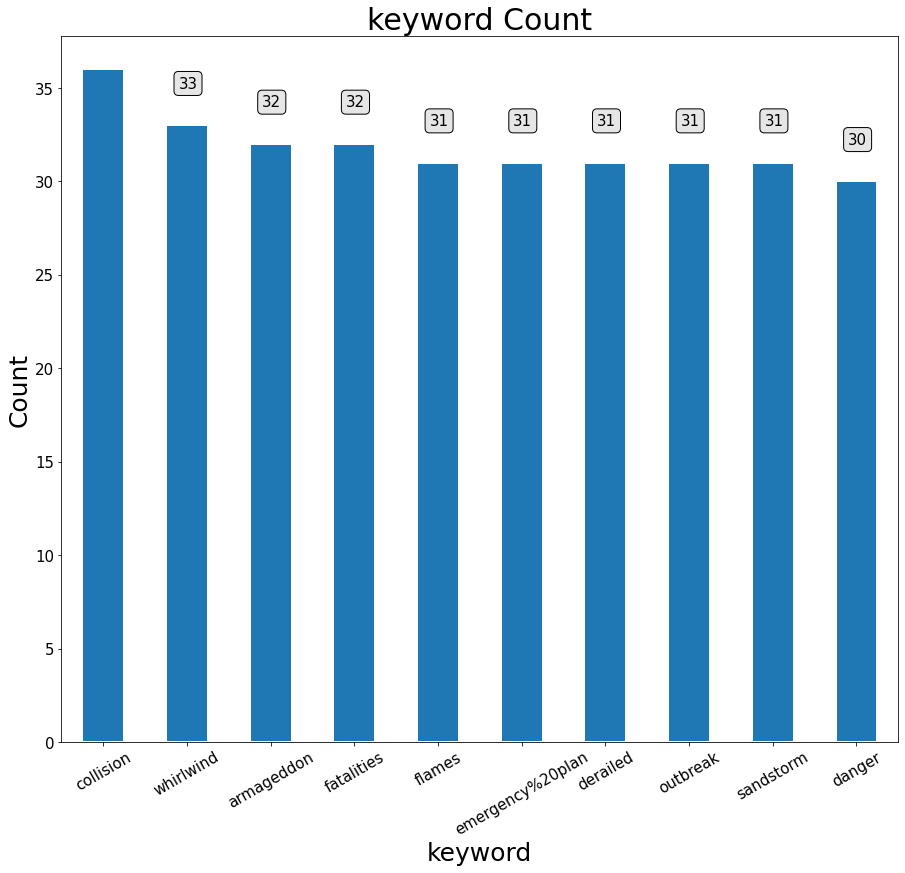

In [12]:
plt.figure(figsize = (15, 13))
ax = plt.axes()
ax.set_facecolor('white')
ax = ((df.keyword.value_counts())[:10]).plot(kind = 'bar',  linewidth = 2, edgecolor = 'white')
plt.title('keyword Count', fontsize = 30)
plt.xlabel('keyword', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
ax.xaxis.set_tick_params(labelsize = 15, rotation = 30)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 2),
                   bbox = bbox_args, fontsize = 15)

In [13]:
Location_Counter = Counter(df["location"])
most_occur = Location_Counter.most_common(5)
print(most_occur)

[('USA', 104), ('New York', 71), ('United States', 50), ('London', 45), ('Canada', 29)]


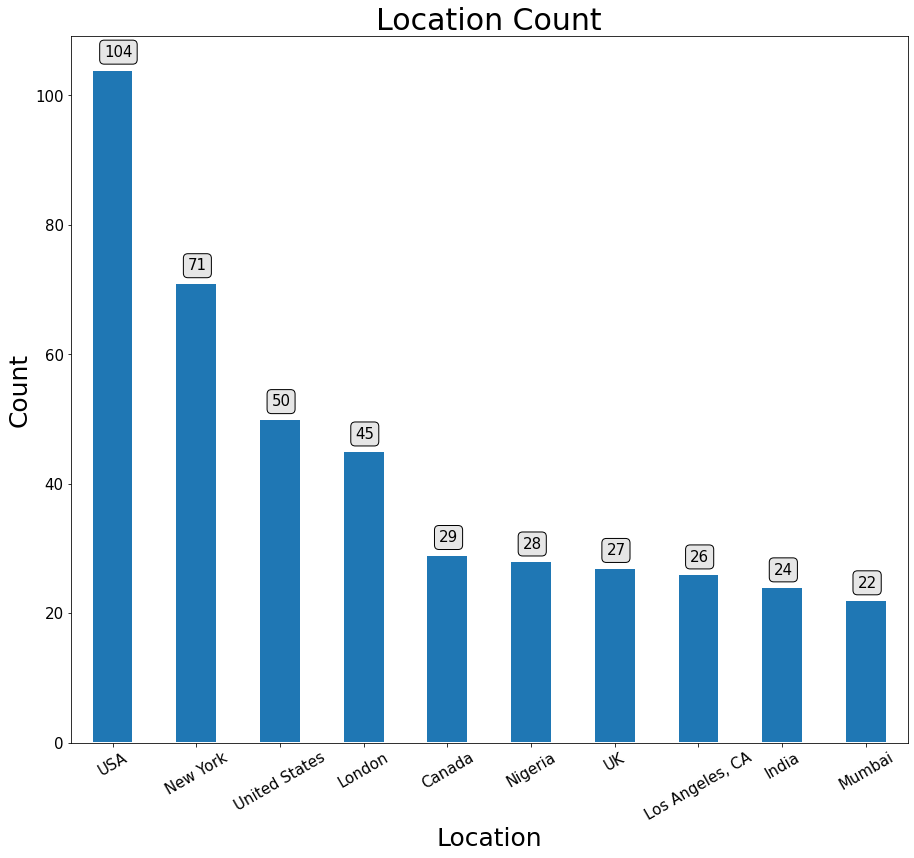

In [14]:
plt.figure(figsize = (15, 13))
ax = plt.axes()
ax.set_facecolor('white')
ax = ((df.location.value_counts())[:10]).plot(kind = 'bar',  linewidth = 2, edgecolor = 'white')
plt.title('Location Count', fontsize = 30)
plt.xlabel('Location', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
ax.xaxis.set_tick_params(labelsize = 15, rotation = 30)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 2),
                   bbox = bbox_args,fontsize = 15)

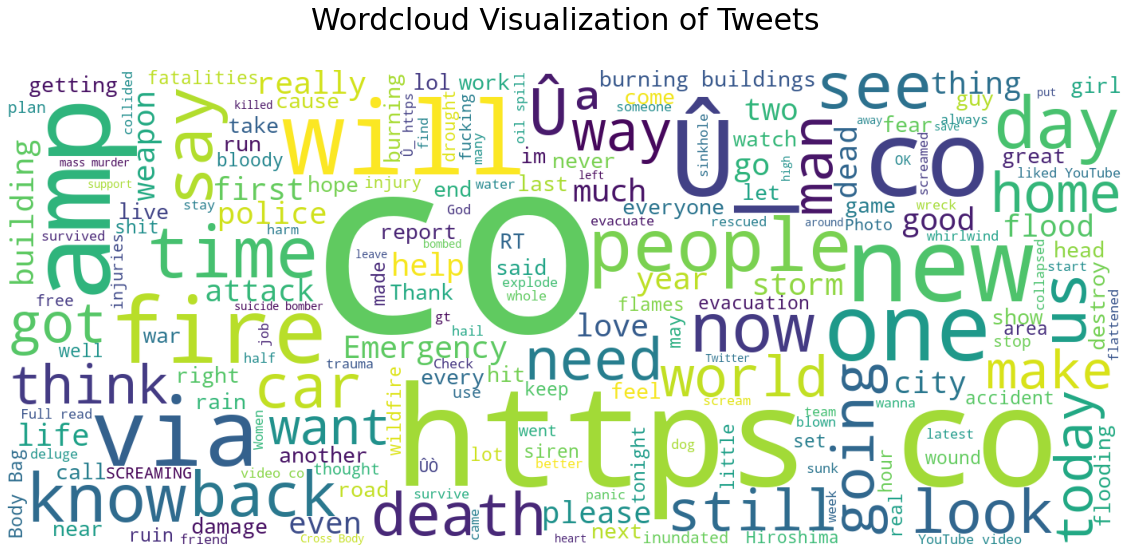

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1400, height = 600, background_color = 'white').generate(''.join(text for text in df['text']))
plt.figure(figsize = (20, 10))
plt.title('Wordcloud Visualization of Tweets\n', fontsize = 30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Use nlp to prepare dataset

In [16]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords 
english_stopwords=stopwords.words('english')

from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()

import string
string_punctuation=string.punctuation    

# stm علشان نجيب مصدر الكلمه بستعمل 
from nltk.stem import PorterStemmer
ps=PorterStemmer()

import re # for regular expressions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:

def cleanText(Sequence):
    tweet_clean=[]

    Sequence=re.sub(r'http\S+', '', Sequence) # To remove any link
    Sequence=Sequence.lower()

    Sequence=re.sub(r'#[a-zA-Z0-9|_]*',"",Sequence) # السطر دا معناه اشيل كل # و اعوض مكانها بمسافه فاضيه
    Sequence=re.sub(r'@[a-zA-Z0-9|_]*',"",Sequence) 

    Sequence=re.sub(r'\d','',Sequence) # (\d)==> any digit here we will remove 
    Sequence=re.sub(r'\W',' ',Sequence) #'\W' will remove any thing not character or number or under score '_'

    Sequence=re.sub(r'^\s+','',Sequence) # if there is white space in the start
    Sequence=re.sub(r'\s+$','',Sequence) # if there is white space in the End
    

# tokanize the tweet
    
    Sequence_token=tokenizer.tokenize(Sequence)

#     remove Stop words and punctuation
    for word in Sequence_token:
        if (word not in english_stopwords and word not in string_punctuation):
            tweet_clean.append(word)
    return tweet_clean
 



In [18]:

def process_text(tweets):
    result=[]  
    for tweet in tweets:
        tweet_result=cleanText(tweet)
        result.append(tweet_result)
    return result



In [19]:
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

print(X_train[:5])

1392    That triumphant moment when you cook up two eg...
5716    VIDEO: 'We're picking up bodies from water': R...
5036    British bake off was great pretty hilarious mo...
6757    Environment Canada confirms 2nd tornado touche...
5579    The Latest: More Homes Razed by Northern Calif...
Name: text, dtype: object


In [20]:
X_train=process_text(X_train)
X_test=process_text(X_test)

print(len(X_train))


4567


In [21]:
X_train[:5]

[['triumphant', 'moment', 'cook', 'two', 'eggs', 'easy', 'yolk', 'casualties'],
 ['video',
  'picking',
  'bodies',
  'water',
  'rescuers',
  'searching',
  'hundreds',
  'migrants',
  'mediterranean',
  'boat',
  'carryi'],
 ['british', 'bake', 'great', 'pretty', 'hilarious', 'moments'],
 ['environment',
  'canada',
  'confirms',
  'nd',
  'tornado',
  'touched',
  'last',
  'weekend',
  'åè'],
 ['latest',
  'homes',
  'razed',
  'northern',
  'california',
  'wildfire',
  'abc',
  'news']]

In [22]:
# df=df.drop(['text'], axis=1)


In [23]:
# df.insert(2, "text", pd.Series(text_ser), True)

## split data to positive and negative

In [24]:
df=df.dropna()
df

,keyword,location,text,target
id,,,,
48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0


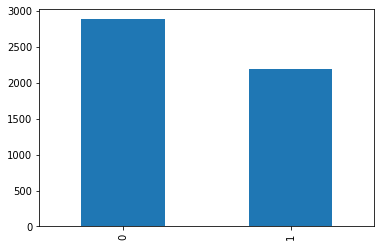

In [25]:
df['target'].value_counts().plot(kind='bar')


In [26]:
# first transform to encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# le.fit(y_train)
y_train_transform=le.fit_transform(y_train)
y_test_transform=le.fit_transform(y_test)


In [27]:
y_train_transform=to_categorical(y_train_transform)
y_test_transform=to_categorical(y_test)

y_train_transform

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
Tokenizer=Tokenizer()
Tokenizer.fit_on_texts(X_train)
Tokenizer.fit_on_texts(X_test)

X_train = Tokenizer.texts_to_sequences(X_train)
X_test = Tokenizer.texts_to_sequences(X_test)


In [29]:
print(X_train)


[[5816, 805, 1386, 36, 3108, 1505, 5817, 370], [10, 668, 590, 96, 258, 591, 342, 228, 1387, 275, 2524], [775, 2128, 105, 612, 1506, 1672], [5818, 1193, 1388, 806, 390, 3987, 68, 1020, 2525], [110, 106, 416, 97, 27, 101, 613, 19], [524, 3988, 229, 1507, 1673, 3989, 5819, 2526], [1870, 229, 2129, 2527, 2130, 5820, 5821, 639], [87, 1508, 119, 961, 102], [47, 912, 807, 76, 343, 592, 3990, 640, 130, 1279, 1871, 1021, 1509, 275, 50, 98, 2], [430, 1674, 2131, 1280, 455, 1281], [3991, 3109, 431, 856, 7], [5822, 550, 5823, 3110], [344, 193, 5824, 5825, 2], [567, 5826, 71, 568, 5827, 391, 93, 5828], [1872, 5829, 13, 1105, 3111, 10, 2132, 808, 165, 5830, 5831, 5832, 3992], [732, 194, 5833, 5834, 5835, 1022, 99, 230, 639, 733, 5836, 5837, 3993], [276, 195, 1023, 432, 1675, 1282, 3112, 1106, 2528, 734], [3, 1510, 2529, 44, 1194, 433, 140, 21, 2133, 1676, 16, 3994, 2530], [1389, 857, 38, 1873, 345, 456, 1874, 1195, 696, 3, 131, 456, 58, 47, 1511, 1875], [1283, 697, 75, 1196, 246, 297, 3995], [83, 58

Give fixed len for all sequences

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_seq=pad_sequences(X_train,maxlen=15)
X_test_seq=pad_sequences(X_test,maxlen=15)

print(X_train_seq)
print(len(X_train_seq),"is pad_sequence length")

[[    0     0     0 ...  1505  5817   370]
 [    0     0     0 ...  1387   275  2524]
 [    0     0     0 ...   612  1506  1672]
 ...
 [    0     0     0 ...   733  2565 10056]
 [    0     0     0 ...   644 10057 10058]
 [    0     0     0 ...    40   344    17]]
4567 is pad_sequence length


In [31]:
X_train_seq[0]

array([   0,    0,    0,    0,    0,    0,    0, 5816,  805, 1386,   36,
       3108, 1505, 5817,  370], dtype=int32)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,GlobalAveragePooling1D,LSTM

model=Sequential()
model.add(Embedding(68505 ,10,input_length=15 ))
model.add(LSTM( 128 , dropout = 0.20, recurrent_dropout = 0.20))
# model.add(GlobalAveragePooling1D())
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [33]:
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 10)            685050    
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 757,296
Trainable params: 757,296
Non-trainable params: 0
_________________________________________________________________


In [34]:
early_stopper = EarlyStopping( monitor = 'val_acc' , min_delta = 0.0005, patience = 3 )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)
callbacks = [ reduce_lr , early_stopper]

train_history =model.fit(X_train_seq, y_train_transform,  batch_size=128, epochs=20, validation_split = 0.2 , verbose = 1 , callbacks = callbacks)

Epoch 1/20
29/29 [==============================] - 13s 163ms/step - loss: 0.6899 - accuracy: 0.5710 - val_loss: 0.6898 - val_accuracy: 0.5470 - lr: 0.0010
Epoch 2/20
29/29 [==============================] - 2s 84ms/step - loss: 0.6706 - accuracy: 0.6480 - val_loss: 0.6561 - val_accuracy: 0.7046 - lr: 0.0010
Epoch 3/20
29/29 [==============================] - 2s 85ms/step - loss: 0.5373 - accuracy: 0.8185 - val_loss: 0.5431 - val_accuracy: 0.7648 - lr: 0.0010
Epoch 4/20
29/29 [==============================] - 2s 85ms/step - loss: 0.4269 - accuracy: 0.8930 - val_loss: 0.5785 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 5/20
29/29 [==============================] - 2s 84ms/step - loss: 0.3558 - accuracy: 0.9275 - val_loss: 0.5997 - val_accuracy: 0.7648 - lr: 0.0010
Epoch 6/20
29/29 [==============================] - 2s 81ms/step - loss: 0.3152 - accuracy: 0.9480 - val_loss: 0.6229 - val_accuracy: 0.7582 - lr: 1.0000e-04
Epoch 7/20
29/29 [==============================] - 2s 82ms/step - los

In [35]:
score = model.evaluate( X_train_seq , y_train_transform , batch_size = 128)

print( "Accuracy: {:0.4}".format( score[1] ))

print( "Loss:", score[0] )

36/36 [==============================] - 0s 7ms/step - loss: 0.3677 - accuracy: 0.9144
Accuracy: 0.9144
Loss: 0.3677412271499634


In [36]:
score = model.evaluate( X_test_seq , y_test_transform , batch_size = 128)

print( "Accuracy: {:0.4}".format( score[1]))

print( "Loss:", score[0] )

24/24 [==============================] - 0s 7ms/step - loss: 0.6390 - accuracy: 0.7646
Accuracy: 0.7646
Loss: 0.6389674544334412


In [37]:
mlist=df['text'].tolist()
inp=mlist[-2]

inp=pad_sequences(Tokenizer.texts_to_sequences([inp]),maxlen=15)
        
result=np.argmax(model.predict(inp))
f_result=le.inverse_transform(np.array(result).reshape(1))


print("it's Target is:" , f_result)



it's Target is: [0]


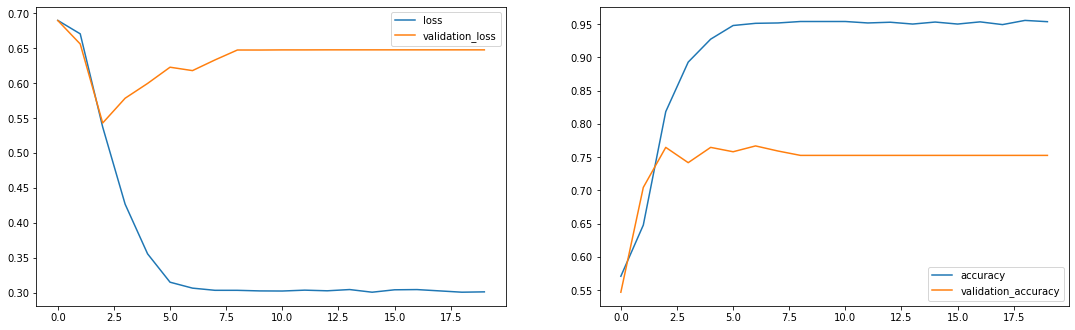

In [38]:
loss = train_history.history['loss']

validation_loss = train_history.history['val_loss']

accuracy = train_history.history['accuracy']

val_accuracy = train_history.history['val_accuracy']

fig = plt.gcf()

fig.set_size_inches(18.5, 5.5)

plt.subplot(1,2,1)

plt.plot(loss)

plt.plot(validation_loss)

plt.legend(['loss', 'validation_loss'])

plt.subplot(1,2,2)

plt.plot(accuracy)

plt.plot(val_accuracy)

plt.legend(['accuracy', 'validation_accuracy'])

plt.show()

Test Model

In [39]:
df2 = pd.read_csv("test.csv")

df2.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [40]:
test_text = pd.Series(df2["text"])
test_text=process_text(test_text)


In [41]:
df2=df2.drop(['text'], axis=1)
df2.insert(2, "text", pd.Series(test_text), True)


In [42]:
## Remove any row having nan value in any of its column.
df2=df2.dropna()


In [43]:
df2

,id,keyword,text,location
15,46,ablaze,"[birmingham, wholesale, market, ablaze, bbc, n...",London
16,47,ablaze,"[wear, shorts, race, ablaze]",Niall's place | SAF 12 SQUAD |
17,51,ablaze,"[toke, makinwa, ûªs, marriage, crisis, sets, n...",NIGERIA
18,58,ablaze,[check],Live On Webcam
19,60,ablaze,"[psa, ûªm, splitting, personalities, techies, ...","Los Angeles, Califnordia"
...,...,...,...,...
3246,10804,wrecked,"[think, deactivated, notifications, aids, tesc...",Love Reiss
3247,10806,wrecked,"[rt, cnbc, words, disney, ceo, bob, iger, wrec...",Seattle Washington
3248,10807,wrecked,"[smackdown, tyme, put, good, mood, since, got,...",Acey mountain islanddåÇTorontoåÈ
3249,10816,wrecked,"[jsyk, stopped, thinking, abt, remus, slumped,...",los angeles


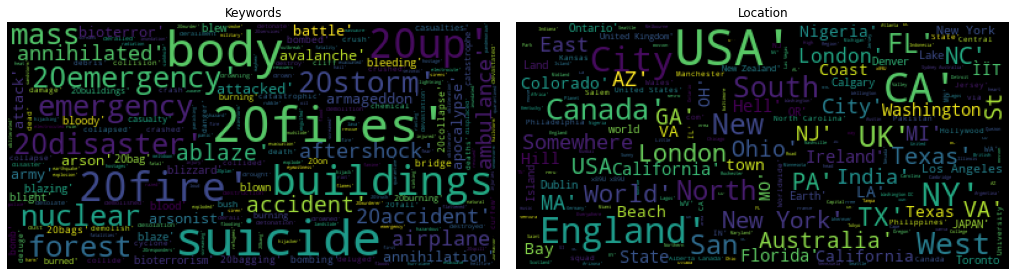

In [44]:
keyword_words = str(df2['keyword']
    .dropna()
    .unique()
    .tolist()
)

location_words = str(df2['location']
    .dropna()
    .unique()
    .tolist()
)


keyword_wordcloud = WordCloud(
    background_color='black',
    stopwords=None,
    max_words=200,
    max_font_size=40, 
    random_state=42
).generate(keyword_words)

location_wordcloud = WordCloud(
    background_color='black',
    stopwords=None,
    max_words=200,
    max_font_size=40, 
    random_state=42
).generate(location_words)

fig, ax = plt.subplots(1,2, figsize=(14,9), constrained_layout=True)
ax[0].set_title("Keywords")
ax[0].imshow(keyword_wordcloud)
ax[0].axis(False)
ax[1].set_title('Location')
ax[1].imshow(location_wordcloud)
ax[1].axis(False)
plt.show()

In [45]:
test_list=df2['text'].tolist()
Test_Target=[]
# for i in range(len(test_list)):
for tweet_text in test_list:
  # inp=test_list[i]
  tweet_text=pad_sequences(Tokenizer.texts_to_sequences([tweet_text]),maxlen=15)      
  result=np.argmax(model.predict(tweet_text))
  f_result=le.inverse_transform(np.array(result).reshape(1))
  Test_Target.append(f_result)

# Test_Target



In [46]:
print(len(test_list))

2158


In [47]:
x = np.array(Test_Target)
print(np.unique(x))

[0 1]


In [48]:
print("the target 1 is = ",Test_Target.count(0))
print("the target 0 is = ",Test_Target.count(1))

the target 1 is =  1269
the target 0 is =  889


In [49]:
df2.insert(4, "Test_Target", pd.Series(Test_Target), True)
df2

,id,keyword,text,location,Test_Target
15,46,ablaze,"[birmingham, wholesale, market, ablaze, bbc, n...",London,[1]
16,47,ablaze,"[wear, shorts, race, ablaze]",Niall's place | SAF 12 SQUAD |,[0]
17,51,ablaze,"[toke, makinwa, ûªs, marriage, crisis, sets, n...",NIGERIA,[0]
18,58,ablaze,[check],Live On Webcam,[1]
19,60,ablaze,"[psa, ûªm, splitting, personalities, techies, ...","Los Angeles, Califnordia",[1]
...,...,...,...,...,...
3246,10804,wrecked,"[think, deactivated, notifications, aids, tesc...",Love Reiss,NaN
3247,10806,wrecked,"[rt, cnbc, words, disney, ceo, bob, iger, wrec...",Seattle Washington,NaN
3248,10807,wrecked,"[smackdown, tyme, put, good, mood, since, got,...",Acey mountain islanddåÇTorontoåÈ,NaN
3249,10816,wrecked,"[jsyk, stopped, thinking, abt, remus, slumped,...",los angeles,NaN


In [50]:
inp=test_list[-1]
inp=pad_sequences(Tokenizer.texts_to_sequences([inp]),maxlen=15)      
result=np.argmax(model.predict(inp))
f_result=le.inverse_transform(np.array(result).reshape(1))

print(f_result)

[0]


Save Model


In [51]:
model.save('my_model.h5', overwrite=True) 
